In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


# **Importing Libraries**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading Data Training Data 

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'D:/archive (3)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 77090 files belonging to 48 classes.


# Loading Validation Set

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'D:/archive (3)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 20781 files belonging to 48 classes.


In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

# CNN Linear Stack

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\KEDAAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=48,activation='softmax'))

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │        72,048 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,857,772 (29.98 MB)

 Trainable params: 7,857,772 (29.98 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 1178s 488ms/step - accuracy: 0.3913 - loss: 2.2332 - val_accuracy: 0.7401 - val_loss: 0.9922
Epoch 2/10
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 1147s 476ms/step - accuracy: 0.8308 - loss: 0.5425 - val_accuracy: 0.8116 - val_loss: 0.8016
Epoch 3/10
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 1144s 475ms/step - accuracy: 0.9031 - loss: 0.3023 - val_accuracy: 0.8684 - val_loss: 0.5842
Epoch 4/10
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 1142s 474ms/step - accuracy: 0.9344 - loss: 0.2060 - val_accuracy: 0.8798 - val_loss: 0.6935
Epoch 5/10
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 1138s 472ms/step - accuracy: 0.9508 - loss: 0.1523 - val_accuracy: 0.9028 - val_loss: 0.6010
Epoch 6/10
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 1133s 470ms/step - accuracy: 0.9619 - loss: 0.1148 - val_accuracy: 0.8894 - val_loss: 0.5442
Epoch 7/10
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 1132s 470ms/step - accuracy: 0.9684 - loss: 0.0967 - val_accuracy: 0.9118 - val_loss: 0.6153
Epoch 8/10
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 1127s 468ms/s

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2410/2410 ━━━━━━━━━━━━━━━━━━━━ 317s 131ms/step - accuracy: 0.9892 - loss: 0.0406
Training accuracy: 0.9901154637336731


In [20]:
#Training set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

650/650 ━━━━━━━━━━━━━━━━━━━━ 267s 411ms/step - accuracy: 0.9116 - loss: 0.5941
Validation accuracy: 0.9116019606590271


In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5968867540359497,
  0.8568815588951111,
  0.9118562936782837,
  0.9390063285827637,
  0.9541444778442383,
  0.96402907371521,
  0.9702425599098206,
  0.9749124646186829,
  0.9783499836921692,
  0.981515109539032],
 'loss': [1.3990639448165894,
  0.45534124970436096,
  0.2760712802410126,
  0.18952342867851257,
  0.1407354474067688,
  0.11019938439130783,
  0.09046472609043121,
  0.07860966771841049,
  0.0660926103591919,
  0.0570211224257946],
 'val_accuracy': [0.7401472330093384,
  0.8115586638450623,
  0.868389368057251,
  0.8798421621322632,
  0.9027958512306213,
  0.8894182443618774,
  0.9118425250053406,
  0.9126124978065491,
  0.9065492749214172,
  0.9116019606590271],
 'val_loss': [0.9922018647193909,
  0.8016089200973511,
  0.5841687321662903,
  0.6935359239578247,
  0.6009732484817505,
  0.5442172884941101,
  0.6153102517127991,
  0.5518973469734192,
  0.5545583367347717,
  0.5681696534156799]}

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


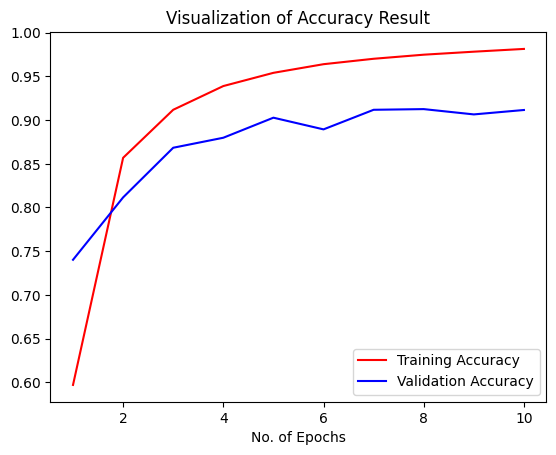

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [26]:
class_name = validation_set.class_names

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'D:/archive (3)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 20781 files belonging to 48 classes.


In [30]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

20781/20781 ━━━━━━━━━━━━━━━━━━━━ 225s 11ms/step


In [31]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:
Y_true

<tf.Tensor: shape=(20781,), dtype=int64, numpy=array([ 0,  0,  0, ..., 47, 47, 47], dtype=int64)>

In [33]:
predicted_categories

<tf.Tensor: shape=(20781,), dtype=int64, numpy=array([ 0,  0,  0, ..., 47, 47, 47], dtype=int64)>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [35]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.94      0.95       504
                                 Apple___Black_rot       0.96      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.95      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.94      0.92       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

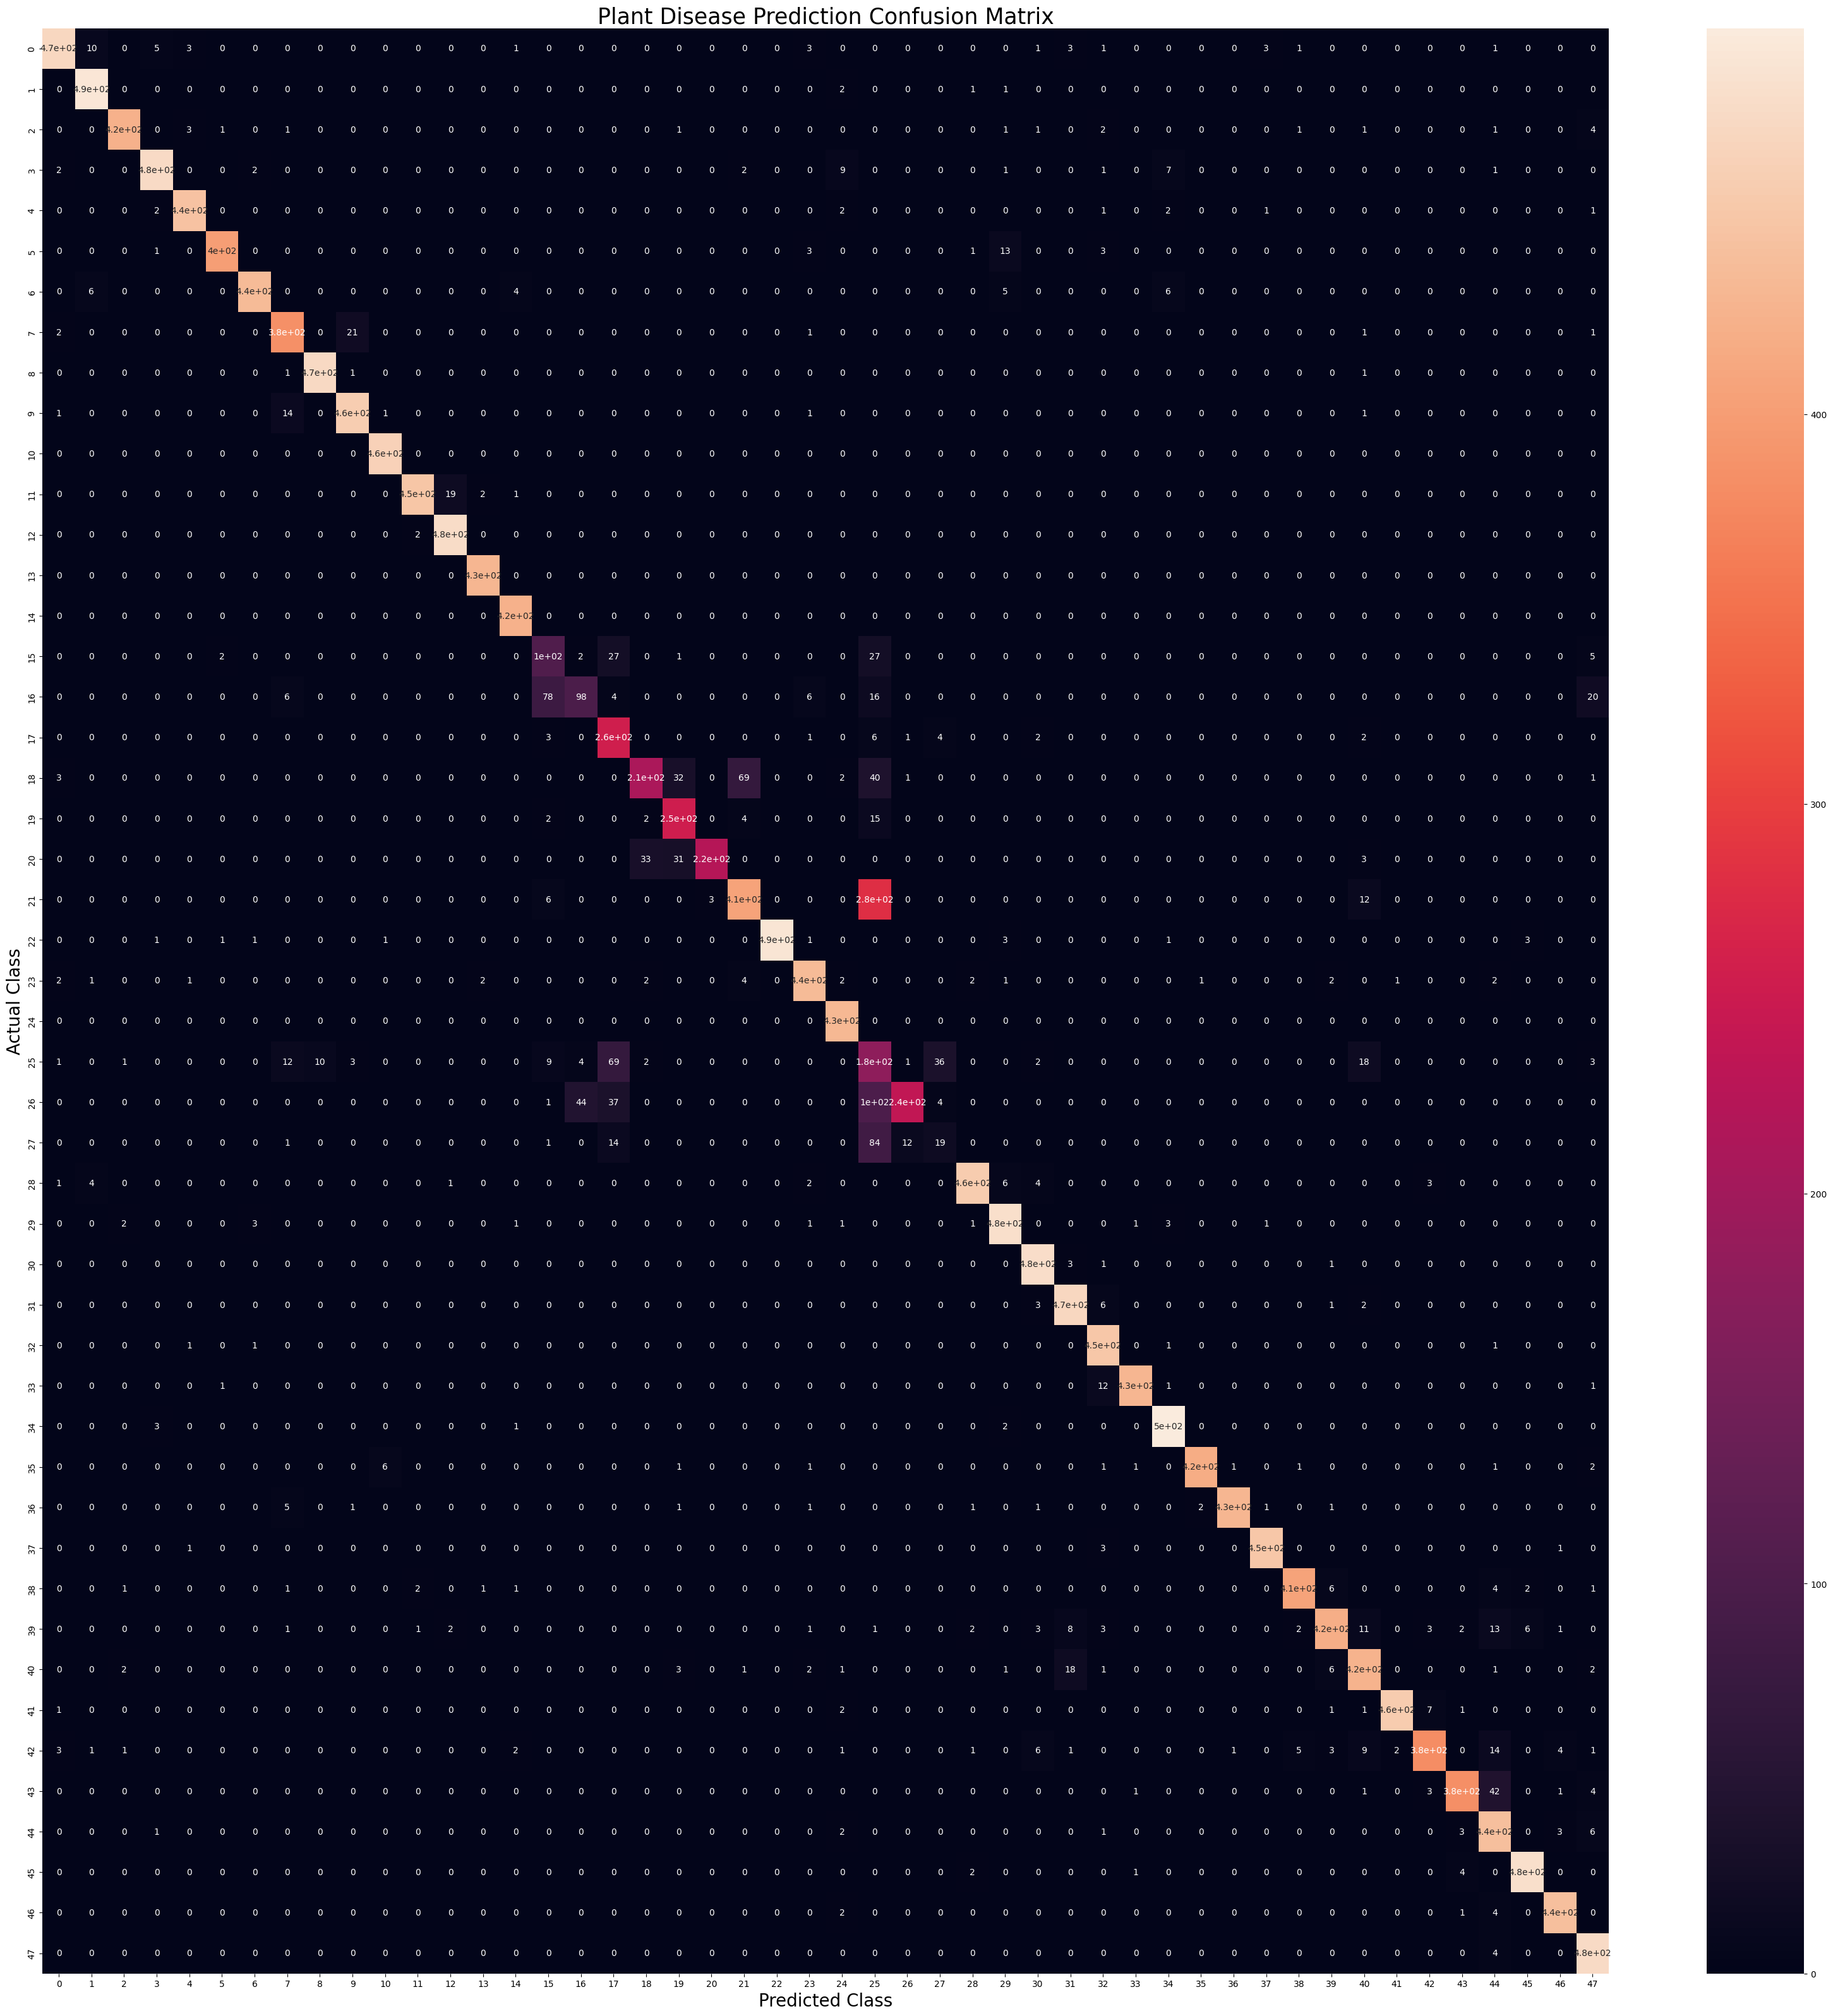

In [36]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()